In [3]:
#GARCIA MATA LEONARDO 6IV8
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_s = pd.read_excel("Catalogo_sucursal.xlsx")
df_p = pd.read_excel("proyecto1.xlsx")

In [4]:
# Verificacion
print("Columnas de sucursal:", df_p.columns)
print("Columnas de proyecto:", df_s.columns)

Columnas de sucursal: Index(['Unnamed: 0', 'B_mes', 'fec_ini_cdto', 'id_sucursal', 'B_adeudo',
       'ventas_tot', 'no_clientes', 'adeudo_actual', 'pagos_tot', 'no_cdtos'],
      dtype='object')
Columnas de proyecto: Index(['id_sucursal', 'suc'], dtype='object')


In [5]:
#Conversion de dato a tipo fecha
if "fec_ini_cdto" in df_p.columns:
    df_p["fec_ini_cdto"] = pd.to_datetime(df_p["fec_ini_cdto"])

In [13]:
#1. Calculo de ventas totales
totalvents = df_p["ventas_tot"].sum()
print(f"La ventas totales son: ${totalvents:,.2f}")

La ventas totales son: $1,822,223,747.00


In [48]:
#2. Adeudos

total_socios = len(df_p)

socios_con = df_p[df_p["adeudo_actual"] > 0].shape[0]
socios_sin = df_p[df_p["adeudo_actual"] == 0].shape[0]

#Porcentajes
porcen_con = (socios_con / total_socios) * 100
porcen_sin = (socios_sin / total_socios) * 100

print(f"Socios con adeudo: {socios_con} ({porcen_con:.2f}%)")
print(f"Socios sin adeudo: {socios_sin} ({porcen_sin:.2f}%)")

Socios con adeudo: 5120 (45.14%)
Socios sin adeudo: 6222 (54.86%)


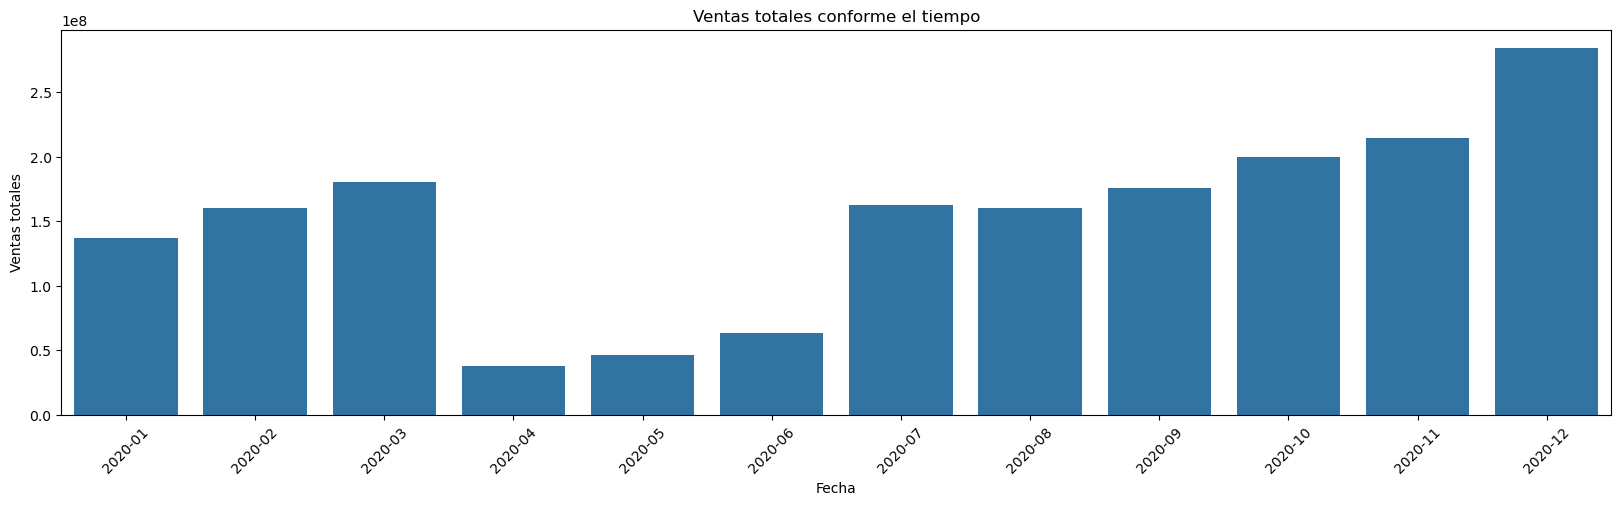

In [51]:
#3. Grafica de barras de totalvents y tiempo
df_p["B_mes"] = df_p["fec_ini_cdto"].dt.to_period("M")#Convertir a periodo

plt.figure(figsize=(20, 5))
sns.barplot(data=df_p, x="B_mes", y="ventas_tot", estimator=np.sum, errorbar=None)
plt.xticks(rotation=45)
plt.xlabel("Fecha")
plt.ylabel("Ventas totales")
plt.title("Ventas totales conforme el tiempo")
plt.show()

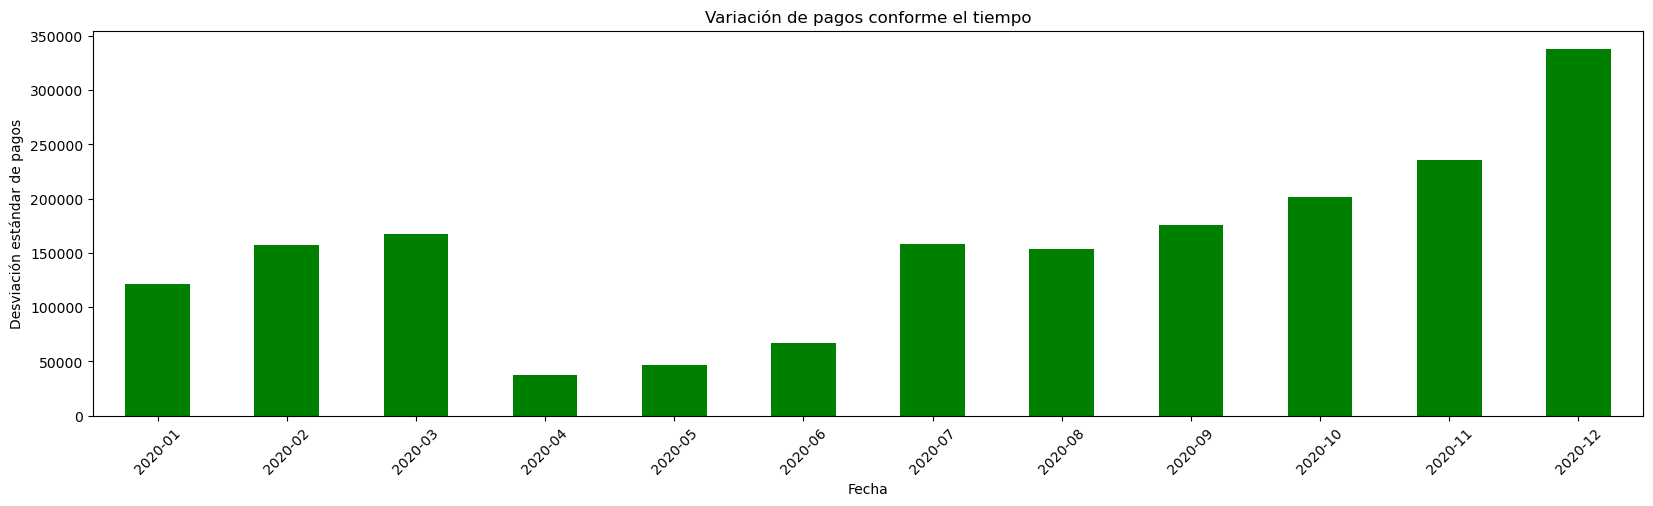

In [49]:
#4. Grafica de desviacion estandar de pagos y tiempo
df_p["B_mes"] = df_p["fec_ini_cdto"].dt.to_period("M")#Convertir a periodo
std_pagos = df_p.groupby("B_mes")["pagos_tot"].std()#Desviacion

plt.figure(figsize=(20, 5))
std_pagos.plot(kind="bar", color="green")
plt.xlabel("Fecha")
plt.ylabel("Desviación estándar de pagos")
plt.title("Variación de pagos conforme el tiempo")
plt.xticks(rotation=45)
plt.show()

In [29]:
#5. Deuda total
totaldeud = df_p["adeudo_actual"].sum()
print(f"La deuda total de los clientes: ${totaldeud:,.2f}")

La deuda total de los clientes: $81,365,970.62


In [30]:
#6. Porcentaje de utilidad del comercio, totalvents y totaladeu
porcenUtil = ((totalvents - totaldeud) / totalvents) * 100
print(f"Porcentaje de utilidad del comercio: {porcenUtil:.2f}%")

Porcentaje de utilidad del comercio: 95.53%


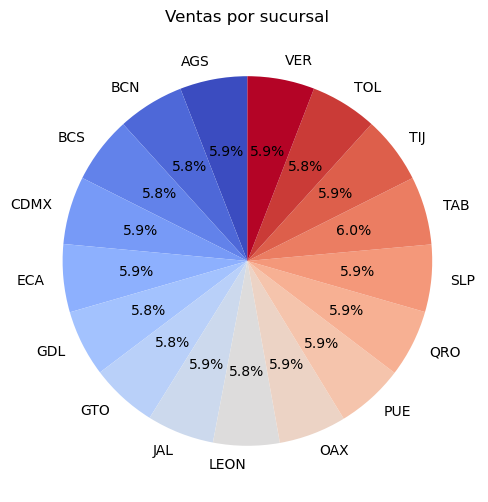

In [45]:
#7. Grafico circular de ventas por sucursal
df_juntos = df_p.merge(df_s, left_on="id_sucursal", right_on="id_sucursal")#Unir los df
ventas_sucursal = df_juntos.groupby("suc")["ventas_tot"].sum()
plt.figure(figsize=(6, 6))
ventas_sucursal.plot(kind="pie", autopct="%1.1f%%", cmap="coolwarm", startangle=90)
plt.title("Ventas por sucursal")
plt.ylabel("")
plt.show()

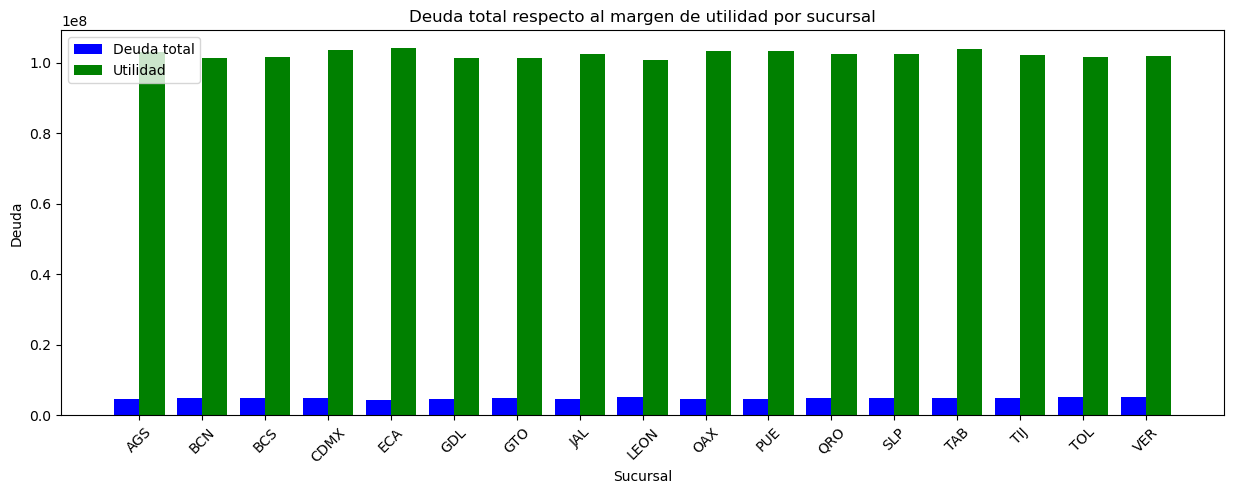

suc
AGS     4538831.60
BCN     4797732.87
BCS     4977417.65
CDMX    4774445.47
ECA     4258369.68
GDL     4669056.63
GTO     4777216.19
JAL     4632733.23
LEON    5094547.38
OAX     4551735.64
PUE     4694078.29
QRO     4852187.13
SLP     4789960.66
TAB     4973964.04
TIJ     4918025.52
TOL     5005481.05
VER     5060187.59
Name: adeudo_actual, dtype: float64

In [47]:
#8. Grafico de deudas por sucursal y utilidad
deuda_sucursal = df_juntos.groupby("suc")["adeudo_actual"].sum()
util_sucursal = df_juntos.groupby("suc")["ventas_tot"].sum() - deuda_sucursal

fig, ax = plt.subplots(figsize=(15, 5))
width = 0.4
x = np.arange(len(util_sucursal))

ax.bar(x - width/2, deuda_sucursal, width, label="Deuda total", color="blue")
ax.bar(x + width/2, util_sucursal, width, label="Utilidad", color="green")

ax.set_xticks(x)
ax.set_xticklabels(deuda_sucursal.index, rotation=45)
ax.set_xlabel("Sucursal")
ax.set_ylabel("Deuda")
ax.set_title("Deuda total respecto al margen de utilidad por sucursal")
ax.legend()

plt.show()

deuda_sucursal